In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data=city_data.merge(ride_data,on="city",how="outer")

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
city_grouped=combined_data.groupby(["city","type"])
fare=city_grouped.fare.mean()
rides=city_grouped["ride_id"].count()
size=city_grouped["driver_count"].mean()
df_cityride=pd.DataFrame({'fare':fare,'ride':rides,'total_count':size})
df_cityride=df_cityride.reset_index()
rural=df_cityride[df_cityride["type"]=='Rural']
urban=df_cityride[df_cityride["type"]=='Urban']
suburban=df_cityride[df_cityride["type"]=='Suburban']



## Bubble Plot of Ride Sharing Data

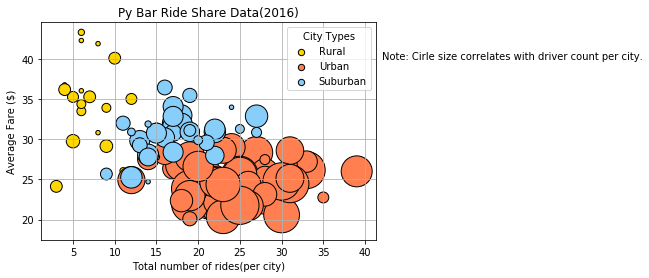

In [4]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
plt.scatter(rural['ride'],rural['fare'],marker='o',s=rural['total_count']*20,color='gold',edgecolors='k',label='Rural')
plt.scatter(urban['ride'],urban['fare'],marker='o',s=urban['total_count']*20,color='coral',edgecolors='k',label='Urban')
plt.scatter(suburban['ride'],suburban['fare'],marker='o',s=suburban['total_count']*20,color='lightskyblue',edgecolors='k',label='Suburban')
plt.grid(True)
plt.xlabel("Total number of rides(per city)")
plt.ylabel("Average Fare ($)")
plt.title("Py Bar Ride Share Data(2016)")
plt.text(42,40,"Note: Cirle size correlates with driver count per city.")
scatter_legend=plt.legend(title="City Types")
scatter_legend.legendHandles[0]._sizes=[40]
scatter_legend.legendHandles[1]._sizes=[40]
scatter_legend.legendHandles[2]._sizes=[40]
plt.savefig("../Images/scatterplot.jpeg")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

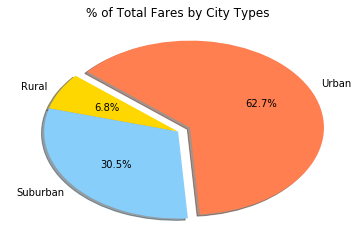

In [6]:
# Calculate Type Percents
colors=['Gold','Lightskyblue','coral']
explode=(0, 0, 0.1)
group_type=combined_data.groupby(["type"])
total_fare=group_type.fare.sum()
df_fare=pd.DataFrame({'Total fare': total_fare})
df_fare=df_fare.reset_index()
df_fare

# Build Pie Chart

plt.pie(df_fare["Total fare"],explode=explode,  labels=df_fare.type, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Types")

# Save Figure
plt.savefig("../Images/totalfares.jpeg")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

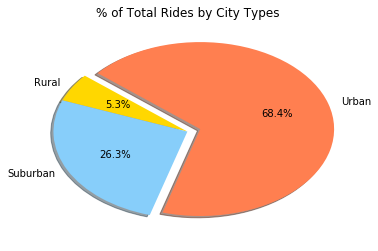

In [9]:
# Calculate Ride Percents
total_ride=group_type.ride_id.count()
df_ride=pd.DataFrame({'Total Rides': total_ride})
df_ride=df_ride.reset_index()
df_ride


# Build Pie Chart
plt.pie(df_ride["Total Rides"],explode=explode,  labels=df_ride.type, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Types")

# Save Figure
plt.savefig("../Images/totalrides.jpeg")



In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [28]:
# Calculate Driver Percents
dc_df=combined_data.drop_duplicates("city",keep="first")
group_driver_type=dc_df.groupby("type")
total_driver=group_driver_type.driver_count.sum()

df_driver=pd.DataFrame({'Total drivers': total_driver})
df_driver=df_driver.reset_index()
df_driver


# Build Pie Charts
plt.pie(df_driver["Total drivers"],explode=explode,  labels=df_driver.type, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Types")

# Save Figure
plt.savefig("../Images/totaldrivers.jpeg")

# Save Figure


KeyError: "['Richardfort' 'Richardfort' 'Richardfort' ... 'South Saramouth'\n 'South Saramouth' 'South Saramouth'] not in index"

In [ ]:
# Show Figure
plt.show()